In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import VAR

from statsmodels.graphics.api import qqplot
%matplotlib inline
import pickle

In [2]:
resource_data=pd.read_csv("D:\Practice2\group_1_1bda6faa-cb1c-4192-94b6-0ff8b19c8caa\mem.log",sep=":",header=None,names=['timestamp','Utilization']) # This is a free datset

In [3]:
resource_data.shape

(6374, 2)

# Modeling The Data 
We are adding the columns of CPU and Memory Utilization 

In [5]:
resource_data[['Memory Allocated','Memory Used','CPU Allocated','CPU Used','Network bandwidth utilization','Storage space utilization']]=resource_data.Utilization.apply(lambda x: pd.Series(str(x).split(":")))

In [6]:
resource_data.head()

,timestamp,Utilization,Memory Allocated,Memory Used,CPU Allocated,CPU Used,Network bandwidth utilization,Storage space utilization
0,Mon Feb 17 12:13:34 IST 2020,0:0:0:0.0:0.0:0G,0,0,0,0.0,0.0,0G
1,Mon Feb 17 12:19:50 IST 2020,0:0:0:0.0:0.0:0G,0,0,0,0.0,0.0,0G
2,Mon Feb 17 12:26:31 IST 2020,0:0:0:0.0:0.0:0G,0,0,0,0.0,0.0,0G
3,Mon Feb 17 12:33:08 IST 2020,0:0:0:0.0:0.0:0G,0,0,0,0.0,0.0,0G
4,Mon Feb 17 12:39:53 IST 2020,0:0:0:0.0:0.0:0G,0,0,0,0.0,0.0,0G


In [7]:
# Dropping The Utilizatiojn Column After Splitting it
resource_data.drop(['Utilization'],axis=1,inplace=True)
resource_data['Storage space utilization']=resource_data['Storage space utilization'].apply(lambda x: str(x[:len(x)-1])) #Removin #Removing the Last Aplphabet To Make the Intrger

In [8]:
resource_data.head()

,timestamp,Memory Allocated,Memory Used,CPU Allocated,CPU Used,Network bandwidth utilization,Storage space utilization
0,Mon Feb 17 12:13:34 IST 2020,0,0,0,0.0,0.0,0
1,Mon Feb 17 12:19:50 IST 2020,0,0,0,0.0,0.0,0
2,Mon Feb 17 12:26:31 IST 2020,0,0,0,0.0,0.0,0
3,Mon Feb 17 12:33:08 IST 2020,0,0,0,0.0,0.0,0
4,Mon Feb 17 12:39:53 IST 2020,0,0,0,0.0,0.0,0


In [9]:
resource_data['timestamp']=pd.to_datetime(resource_data['timestamp']) #Converting Data To TimeStamp

C:\Users\bhanup2\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1218: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [10]:
#Change The Data Type as 
resource_data['Memory Used']=resource_data['Memory Used'].astype('int')
resource_data['Memory Allocated']=resource_data['Memory Allocated'].astype('int')
resource_data['CPU Used']=resource_data['CPU Used'].astype('float')
resource_data['CPU Allocated']=resource_data['CPU Allocated'].astype('int')
resource_data['Storage space utilization']=resource_data['Storage space utilization'].astype('int')
resource_data['Network bandwidth utilization']=resource_data['Network bandwidth utilization'].astype('float')
resource_data.dtypes

timestamp                        datetime64[ns]
Memory Allocated                          int32
Memory Used                               int32
CPU Allocated                             int32
CPU Used                                float64
Network bandwidth utilization           float64
Storage space utilization                 int32
dtype: object

In [11]:
resource_data.set_index('timestamp',inplace=True) # Seeting Time Stamp To The Index Column

# Data Pre Processing 
we are pre Processing the data fro Training the Algorithm

In [12]:
resource_data.dtypes

Memory Allocated                   int32
Memory Used                        int32
CPU Allocated                      int32
CPU Used                         float64
Network bandwidth utilization    float64
Storage space utilization          int32
dtype: object

In [13]:
resource_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6374 entries, 2020-02-17 12:13:34 to 2020-06-23 19:41:23
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Memory Allocated               6374 non-null   int32  
 1   Memory Used                    6374 non-null   int32  
 2   CPU Allocated                  6374 non-null   int32  
 3   CPU Used                       6374 non-null   float64
 4   Network bandwidth utilization  6374 non-null   float64
 5   Storage space utilization      6374 non-null   int32  
dtypes: float64(2), int32(4)
memory usage: 249.0 KB


There are no Null Values 

In [15]:
resource_data.nunique()  # There are some values with Constant Values we have to remove them to train our data

Memory Allocated                   2
Memory Used                      553
CPU Allocated                      2
CPU Used                         132
Network bandwidth utilization      1
Storage space utilization          2
dtype: int64

# Plotting The Grapphs


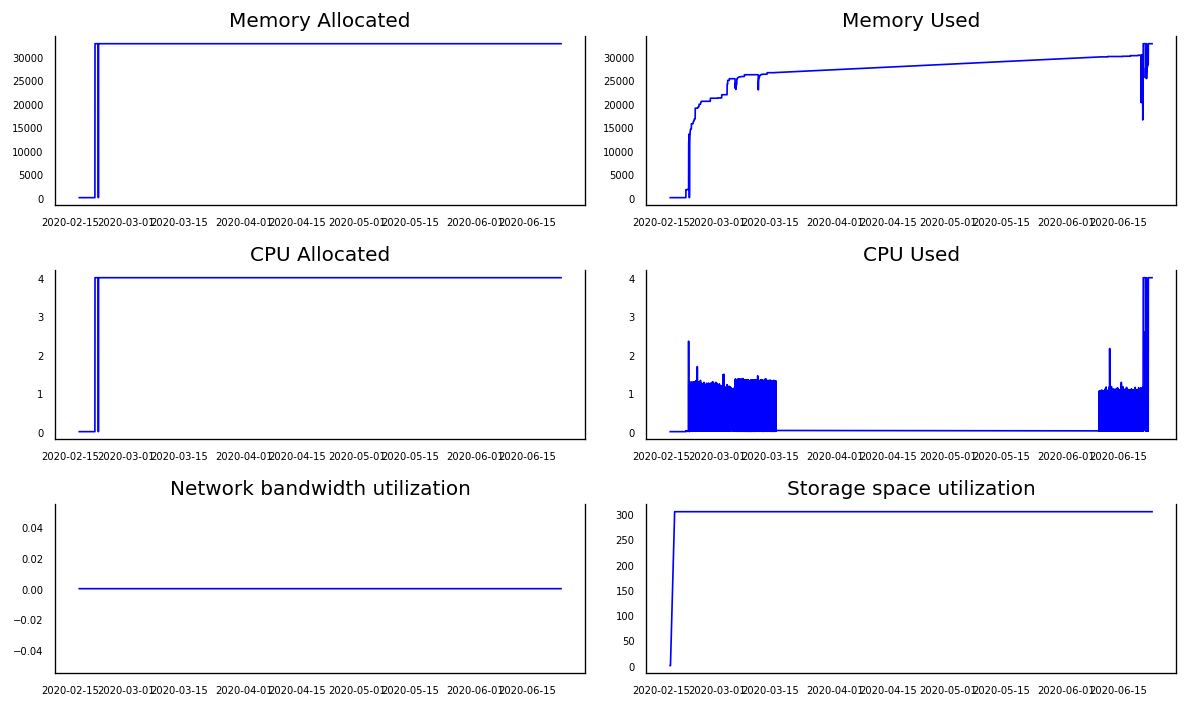

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = resource_data[resource_data.columns[i]]
    ax.plot(data, color='blue', linewidth=1)
    # Decorations
    ax.set_title(resource_data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

We Can See some Values are constant , We need to drop them 

In [17]:
processed_data=resource_data.copy()

In [18]:
for column in resource_data.columns:
    constant_column=resource_data[column].nunique()
    if constant_column==1:
        processed_data.drop([column],axis=1,inplace=True)    

In [19]:
processed_data.head()

,Memory Allocated,Memory Used,CPU Allocated,CPU Used,Storage space utilization
timestamp,,,,,
2020-02-17 12:13:34,0,0,0,0.0,0
2020-02-17 12:19:50,0,0,0,0.0,0
2020-02-17 12:26:31,0,0,0,0.0,0
2020-02-17 12:33:08,0,0,0,0.0,0
2020-02-17 12:39:53,0,0,0,0.0,0


# Training  The Model

In [21]:
nobs = 1000
resource_train, resource_test = processed_data[0:-nobs], processed_data[-nobs:]

# Splitting The Data in Train and test 
print(resource_train.shape)  
print(resource_test.shape)  

(5374, 5)
(1000, 5)


In [22]:
#adfuller_test is used to predict the Stationary of data

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [23]:
for name, column in resource_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Memory Allocated" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.6377
 No. Lags Chosen       = 5
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0855. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Memory Used" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.4082
 No. Lags Chosen       = 32
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.1394. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CPU Allocated" 
    -----------------------------------------------
 Null

C:\Users\bhanup2\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:889: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


As Our Data is not stationary we have to make it Using Differencing

In [42]:
df_differenced = resource_train.diff().dropna()

In [43]:
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Memory Allocated" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -40.6918
 No. Lags Chosen       = 4
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Memory Used" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -19.1605
 No. Lags Chosen       = 33
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CPU Allocated" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.

Data is Stationary now

# Prediction

In [79]:
## Using VAR Model Forecast Our Data , We are searching for the best lag where our data is showing less AIC 

model = VAR(df_differenced)
model_fitted = model.fit(1)

C:\Users\bhanup2\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [80]:
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

1


array([[ 0.  ,  0.  ,  0.  , -0.01,  0.  ]])

In [81]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index= processed_data.index[-nobs:], columns=processed_data.columns+'_d')
df_forecast.head()

,Memory Allocated_d,Memory Used_d,CPU Allocated_d,CPU Used_d,Storage space utilization_d
timestamp,,,,,
2020-06-16 11:50:19,6.095161,5.467859,0.000744,0.003949,0.056812
2020-06-16 11:59:36,6.010744,5.592237,0.000734,-0.001529,0.056777
2020-06-16 12:09:34,6.144228,5.605603,0.000750,0.000611,0.056776
2020-06-16 12:20:42,6.077416,5.601066,0.000742,-0.000225,0.056776
2020-06-16 12:30:23,6.110677,5.603276,0.000746,0.000102,0.056776


Invertig The Data

In [82]:
columns=processed_data.columns
df_final = df_forecast.copy()
for col in columns:
        # Roll back 1st Diff
        df_final[str(col)+'_forecast'] = processed_data[col].iloc[-1] + df_forecast[str(col)+'_d'].cumsum()

In [83]:
df_final.drop(['CPU Used_d','Memory Allocated_d','Memory Used_d','CPU Allocated_d','Storage space utilization_d'],inplace=True,axis=1)

In [84]:
df_final.head()

,Memory Allocated_forecast,Memory Used_forecast,CPU Allocated_forecast,CPU Used_forecast,Storage space utilization_forecast
timestamp,,,,,
2020-06-16 11:50:19,32774.095161,32773.467859,4.000744,4.003949,305.056812
2020-06-16 11:59:36,32780.105906,32779.060096,4.001478,4.002420,305.113589
2020-06-16 12:09:34,32786.250133,32784.665699,4.002228,4.003031,305.170364
2020-06-16 12:20:42,32792.327549,32790.266765,4.002970,4.002806,305.227140
2020-06-16 12:30:23,32798.438226,32795.870041,4.003716,4.002908,305.283916


In [85]:
for column in resource_data.columns:
    constant_column=resource_data[column].nunique()
    if constant_column==1:
        df_final[column]=resource_data[column]

In [71]:
df_final.head()

,Memory Allocated_forecast,Memory Used_forecast,CPU Allocated_forecast,CPU Used_forecast,Storage space utilization_forecast,Network bandwidth utilization
timestamp,,,,,,
2020-06-16 11:50:19,32776.872830,32768.686876,4.001083,4.454647,305.057002,0.0
2020-06-16 11:59:36,32772.444047,32771.502588,4.000542,4.373895,305.113940,0.0
2020-06-16 12:09:34,32795.880950,32779.914794,4.003403,4.123231,305.170879,0.0
2020-06-16 12:20:42,32809.249476,32789.804539,4.005035,4.097586,305.227797,0.0
2020-06-16 12:30:23,32812.304667,32794.640806,4.005408,4.118339,305.284689,0.0


In [86]:
final_df=pd.concat([df_final,resource_test])

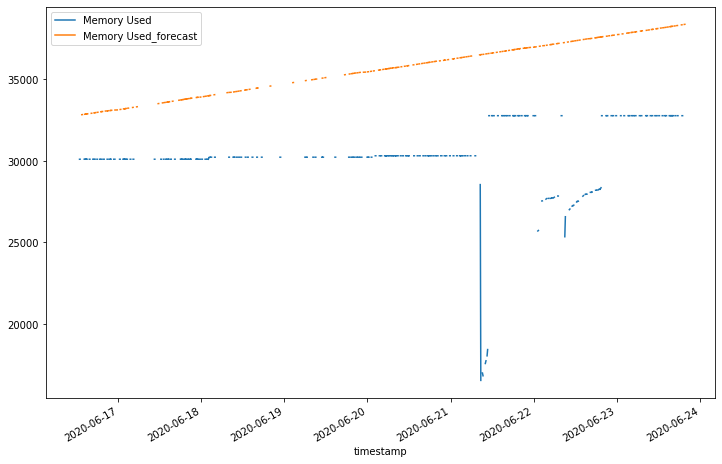

In [87]:
final_df[['Memory Used', 'Memory Used_forecast']].plot(figsize=(12, 8)) 

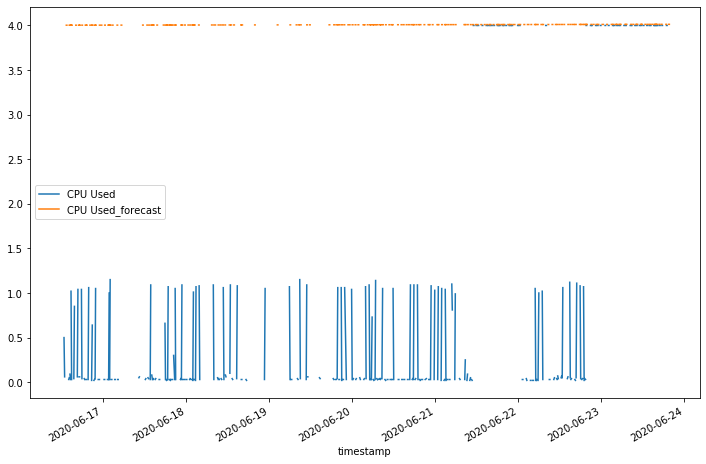

In [88]:
final_df[['CPU Used', 'CPU Used_forecast']].plot(figsize=(12, 8)) 

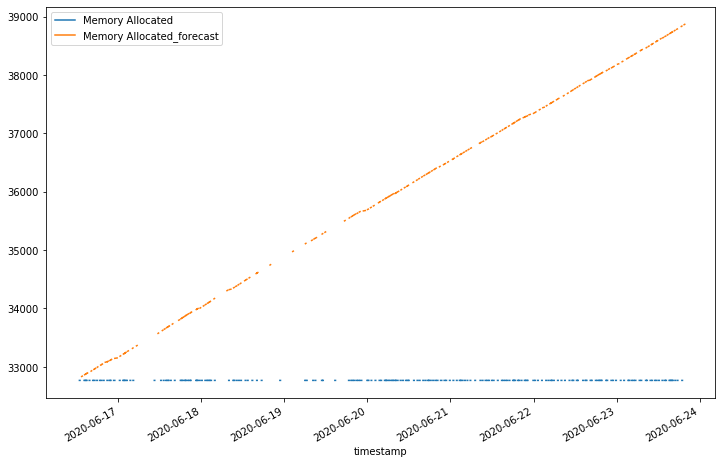

In [89]:
final_df[['Memory Allocated', 'Memory Allocated_forecast']].plot(figsize=(12, 8)) 

In [90]:
filename = 'D:\InstanceModel\Instance2'
outfile = open(filename,'wb')

In [91]:
pickle.dump(model_fitted,outfile)
outfile.close()